In [0]:


# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':''}) # replace the id with id of file you want to access
downloaded.GetContentFile('fashion-mnist_test.csv')  

#3. Read file as panda dataframe
import pandas as pd
data_train = pd.read_csv('fashion-mnist_test.csv')

downloaded = drive.CreateFile({'id':''}) # replace the id with id of file you want to access
downloaded.GetContentFile('fashion-mnist_test.csv') 


data_test = pd.read_csv('fashion-mnist_train.csv')

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "fashionmnist"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

fashion-mnist_test.csv
fashion-mnist_train.csv
t10k-images-idx3-ubyte
t10k-labels-idx1-ubyte
train-images-idx3-ubyte
train-labels-idx1-ubyte



In [7]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np


img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols,1)

X =np.array(data_train.iloc[:,1:])
y = to_categorical(np.array(data_train.iloc[:,0]))
                   
#Here we split validation data to optimiza classifier during training
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)
                   
#Test data
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))



X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

Using TensorFlow backend.


In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D , MaxPooling2D
from keras.layers import BatchNormalization

batch_size = 256
num_classes = 10
epochs = 50

img_rows, img_cols = 28,28


In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(32,kernel_size= (3,3),
                 activation = 'relu',
                kernel_initializer='he_normal',
                 input_shape=input_shape
                ))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [13]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test, verbose=0)

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 3s 367us/step - loss: 1.5565 - acc: 0.4264 - val_loss: 0.8410 - val_acc: 0.7075
Epoch 2/50
8000/8000 [==============================] - 1s 88us/step - loss: 0.8524 - acc: 0.6808 - val_loss: 0.6423 - val_acc: 0.7625
Epoch 3/50
8000/8000 [==============================] - 1s 87us/step - loss: 0.7088 - acc: 0.7366 - val_loss: 0.5935 - val_acc: 0.7835
Epoch 4/50
8000/8000 [==============================] - 1s 86us/step - loss: 0.6251 - acc: 0.7574 - val_loss: 0.5340 - val_acc: 0.8005
Epoch 5/50
8000/8000 [==============================] - 1s 88us/step - loss: 0.5824 - acc: 0.7812 - val_loss: 0.5010 - val_acc: 0.8195
Epoch 6/50
8000/8000 [==============================] - 1s 87us/step - loss: 0.5457 - acc: 0.7930 - val_loss: 0.4655 - val_acc: 0.8360
Epoch 7/50
8000/8000 [==============================] - 1s 99us/step - loss: 0.5112 - acc: 0.8049 - val_loss: 0.4582 - val_acc: 0.8260
Epoch 

In [0]:
model.save('fashion_mnist.h5')

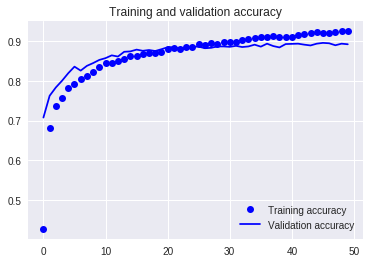

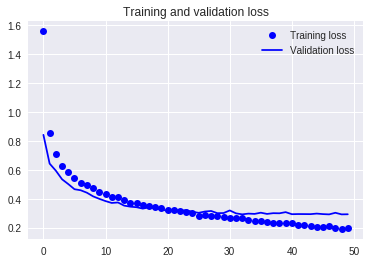

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
from google.colab import files
files.download('fashion_mnist.h5')

In [0]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)

#get the indices to be plotted
y_true = data_test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [21]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.79      0.90      0.84       103
    Class 1       1.00      0.95      0.97        82
    Class 2       0.79      0.92      0.85        89
    Class 3       0.87      0.90      0.88       107
    Class 4       0.81      0.82      0.82       107
    Class 5       0.95      0.96      0.95        76
    Class 6       0.78      0.54      0.64       103
    Class 7       0.95      0.95      0.95        96
    Class 8       0.99      0.99      0.99        91
    Class 9       0.95      0.95      0.95        88

avg / total       0.88      0.88      0.88       942



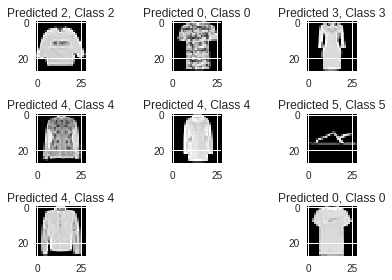

In [23]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

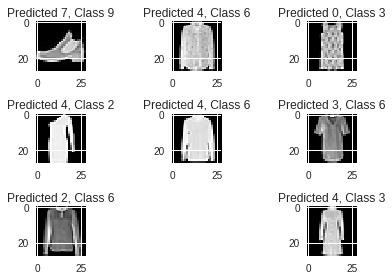

In [24]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

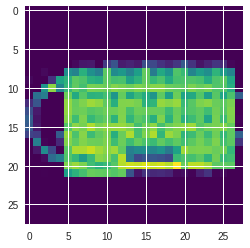

In [25]:
test_im = X_train[154]
plt.imshow(test_im.reshape(28,28), cmap='viridis', interpolation='none')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  This is separate from the ipykernel package so we can avoid doing imports until


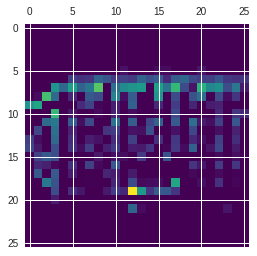

In [26]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(input=model.input, output=layer_outputs)
activations = activation_model.predict(test_im.reshape(1,28,28,1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')